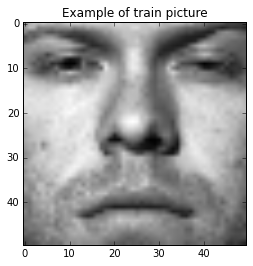

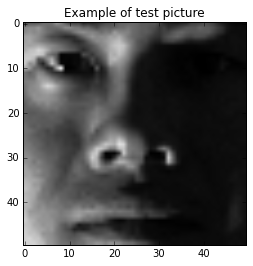

In [2]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

def setup_train():
	train_labels, train_data = [], []
	for line in open('./faces/train.txt'):
		im = misc.imread(line.strip().split()[0])
		train_data.append(im.reshape(2500,))
		train_labels.append(line.strip().split()[1])
	train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
	return (train_labels,train_data)

def setup_test():
	train_labels, train_data = [], []
	for line in open('./faces/test.txt'):
		im = misc.imread(line.strip().split()[0])
		train_data.append(im.reshape(2500,))
		train_labels.append(line.strip().split()[1])
	train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
	return (train_labels,train_data)
    
def plot_picture(pic_data,title,xlbl="X",ylbl="Y"):
    plt.title(title)
    plt.imshow(pic_data.reshape(50,50), cmap = cm.Greys_r)
    plt.show()
    
def partb():
    test_labels, test_data=setup_test()
    train_labels,train_data=setup_train()
    plot_picture(train_data[10, :],"Example of train picture")
    plot_picture(test_data[10, :],"Example of test picture")
partb()

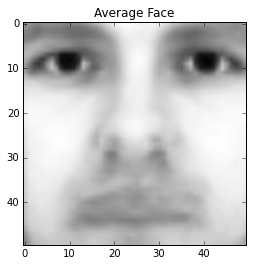

In [22]:
def average_face(train_data):
    summed = np.sum(train_data, axis= 0 )
    face_number = train_data.shape[0]
    average = summed/face_number
    return average
def partc():
    train_labels,train_data=setup_train()
    average=average_face(train_data)
    plot_picture(average,"Average Face")
partc()

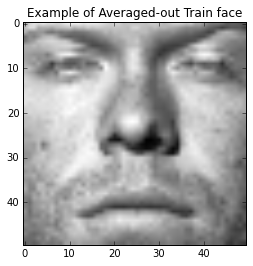

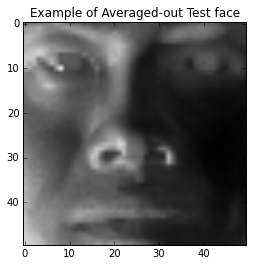

In [25]:
def sub_out_avg(data):
    average=average_face(data)
    data_avg_out=np.subtract(data,average)
    return data_avg_out 

def partd():
    train_labels,train_data=setup_train()
    test_labels,test_data=setup_test()
    
    train_avg_out=sub_out_avg(train_data)
    test_avg_out=sub_out_avg(test_data)
    
    plot_picture(train_avg_out[10,:],"Example of Averaged-out Train face")
    plot_picture(test_avg_out[10,:],"Example of Averaged-out Test face")
partd()

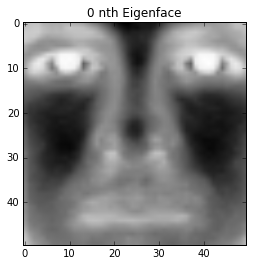

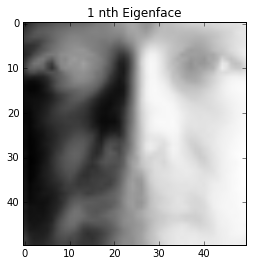

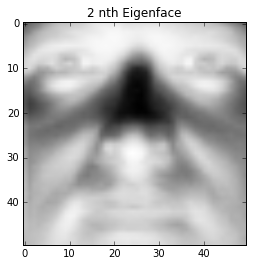

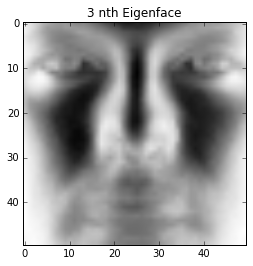

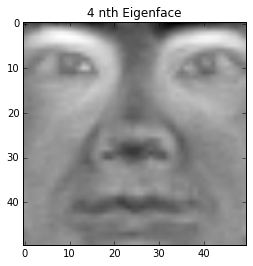

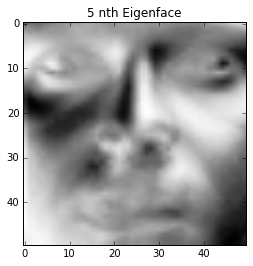

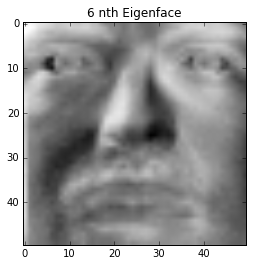

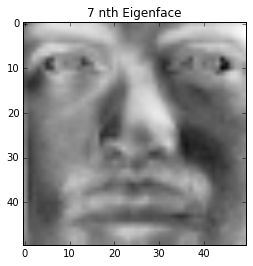

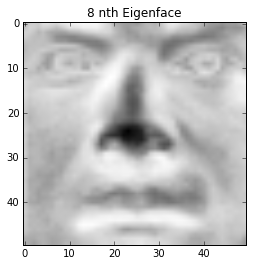

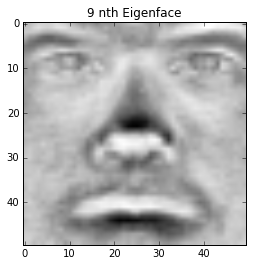

In [3]:
def svd(data):
    U, s, V = np.linalg.svd(data, full_matrices=False)
    return (U,s,V)

def parte():
    train_labels,train_data=setup_train()
    test_labels,test_data=setup_test()
    
    U,s, V= svd(train_data)

    for i in range(10):
        plot_picture(V[i,:],str(i)+" nth Eigenface")
    
    
parte()

100% |########################################################################|


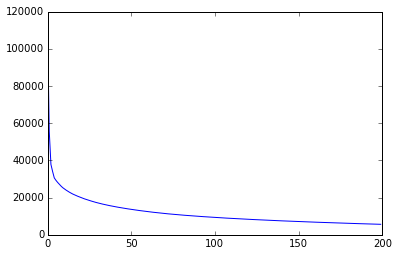

In [66]:
def r_aprox(r,U,s,V):
    S = np.diag(s)
    u_cut=U[:,:r]
    S_cut=S[:r,:r]
    V_cut=V[:r,:]
    X_r=np.dot(u_cut, np.dot(S_cut, V_cut))
    return X_r

def partf():
    from progressbar import ProgressBar
    pbar = ProgressBar()
    
    train_labels,train_data=setup_train()
    test_labels,test_data=setup_test()
    
#     a=[[1,100],[-3,4],[5,6.0001]]
    U,s, V= svd(train_data)
    norm_difs=[]
    
    for i in pbar(range(200)):
        X_r=r_aprox(i,U,s,V)
        dif=np.subtract(train_data,X_r)
        norm_dif=np.linalg.norm(dif)
        norm_difs.append(norm_dif)
    plt.plot(range(200),norm_difs)
partf()

In [4]:
def subspace(data,r):    
    U,s, Vt= svd(data)
    Vt_cut=Vt[:r,:]
    Vtt_cut=np.transpose(Vt_cut)
    F=np.dot(data,Vtt_cut)
    return F
    

def partg():
    train_labels,train_data=setup_train()
    test_labels,test_data=setup_test()
    F=subspace(train_data,101)
    F_test=subspace(test_data,101)
    print (F.shape)
    print (F)
    print (F_test)
partg()

(540, 101)
[[ -4.74967376e+02   2.17973968e+02  -1.70961814e+02 ...,  -1.92683363e+01
   -7.39551455e+01   9.32566308e+01]
 [ -5.65563380e+03   9.01983289e+02   7.94461758e+02 ...,  -1.87443195e+01
    1.16237810e+01  -6.17606931e+00]
 [ -6.04124173e+03  -1.29854205e+00  -1.75008144e+02 ...,   6.17507851e+00
    2.10751912e+01  -1.64582117e+01]
 ..., 
 [ -5.48378327e+03  -1.78398379e+03   5.31020832e+02 ...,   3.27621893e+01
    1.31357099e+01  -7.97692436e+01]
 [ -1.12355710e+03  -3.52854604e+02  -3.59342770e+02 ...,  -1.53967061e+01
   -6.70708637e+01  -1.73495265e+01]
 [ -5.26189590e+03  -2.84122673e+03  -1.06175093e+03 ...,   7.63259734e+01
   -7.79533555e+01   2.02701483e+01]]
[[ -5.56646893e+03   3.07633173e+02   1.49536382e+03 ...,   1.19718668e-01
    5.26835926e-01  -9.88295738e-01]
 [ -4.22723070e+03   2.20116344e+03  -5.46007804e+02 ...,   3.07864874e+00
   -1.17415727e+01   4.90034651e-01]
 [ -7.19972779e+02   2.59163066e+02   2.62483701e+02 ...,  -2.97270199e+00
   -2.5132

In [8]:
def accur_by_r(train_labels,train_data, test_labels,test_data,r):
    F=subspace(train_data,r)
    F_test=subspace(test_data,r)
    lr = LogisticRegression()
    lr.fit(F,train_labels)
    predicted= lr.predict(F_test)
    return metrics.accuracy_score(test_labels, predicted)
def parth():
    from progressbar import ProgressBar
    pbar = ProgressBar()
    train_labels,train_data=setup_train()
    test_labels,test_data=setup_test()
    accuracies=[]
    for i in pbar(range(200)[100:]):
        acc=accur_by_r(train_labels,train_data, test_labels,test_data,i)
        accuracies.append(acc)
    plt.plot(range(200),accuracies)
        
parth()
    

ValueError: X has 100 features per sample; expecting 101